# Part 1

# 1a

**The intents that can be classified by the classifier is:**

•	Account

•	General

•	Sales

•	Technical support

•	Operator


# 1b

The audio files in 'mp3' format are stored in github repository in folder named audio files.

# 1c

The recordings have been transcribed to text and saved in github repository in Utterances.txt file

# 1d

These are manually annotated utterances.

PNG (960, 226) RGBA


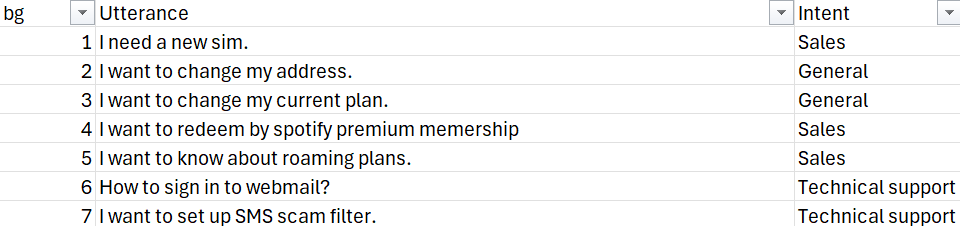

In [7]:
from PIL import Image

# Open an image file
image = Image.open('manual annotation.png')

# Display basic information about the image
print(image.format, image.size, image.mode)

# Show the image
display(image)





# 1e

I have used google Gemini to annotate the rest of the utterances and added a screenshot below

PNG (602, 246) RGBA


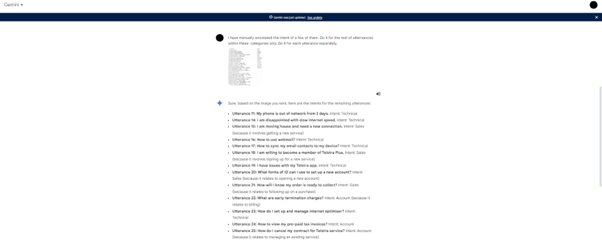

In [8]:

# Open an image file
image_1 = Image.open('annotation.png')

# Display basic information about the image
print(image_1.format, image_1.size, image_1.mode)

# Show the image
display(image_1)


# 1f

I have used Google Gemini to generate another 25 sample texts and its intents.

PNG (602, 295) RGBA


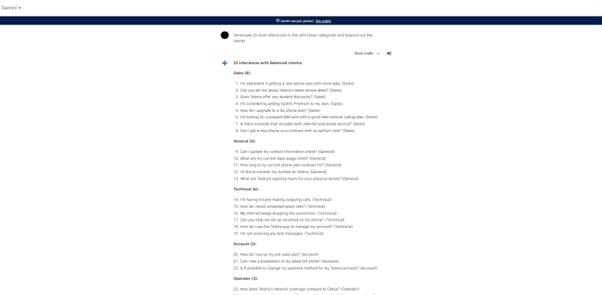

In [9]:

# Open an image file
image_2 = Image.open('generate.png')

# Display basic information about the image
print(image_2.format, image_2.size, image_2.mode)

# Show the image
display(image_2)

# 1g

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import random
# Load the CSV file into a DataFrame
df = pd.read_csv('NLP-2_dataset.csv', encoding='latin1')  # Adjust the encoding here



# Extract the 'Intent' column as a pandas series to use its utility functions
categories = df["Intent"]

# Create a unique list of categories and sort them to ensure consistency
unique_categories = categories.unique().tolist()
unique_categories.sort()  # Sorting ensures consistency in mapping

# Create a mapping dictionary from category labels to integers
category_to_id = {category: id for id, category in enumerate(unique_categories)}

# Use this mapping to convert all category labels in the dataset to integers
def encode_categories(intent):
    return category_to_id[intent]

# Apply the function to the dataset
df["labels"] = df["Intent"].apply(encode_categories)


# Load the data


# Split the data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["Utterance"], df["labels"], test_size=0.1
    
)
# Create dataframes for train and validation data
train_df = pd.DataFrame({"Utterance": train_texts, "labels": train_labels})
val_df = pd.DataFrame({"Utterance": val_texts, "labels": val_labels})


# 1h

For baseline model, I have used distilbert-base-uncased model and the baseline model is named as model here.

In [11]:
import torch
import pandas as pd
import numpy as np

# Assuming train_labels and val_labels are Pandas Series objects containing labels
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

# Tokenize the input texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True)



# Convert the Pandas Series to NumPy arrays
train_labels_array = train_labels.to_numpy()
val_labels_array = val_labels.to_numpy()

# Convert the NumPy arrays to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels_array, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)
val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings["input_ids"]),
    torch.tensor(val_encodings["attention_mask"]),
    torch.tensor(val_labels_array, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)

train_dataset = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(train_encodings["input_ids"], train_encodings["attention_mask"], train_labels)]
val_dataset = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(val_encodings["input_ids"], val_encodings["attention_mask"], val_labels)]


# Define the training arguments
training_args = TrainingArguments(
    output_dir="C:/Users/Dell/Downloads/NLP2",
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=1000,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


{'eval_loss': 1.4061367511749268,
 'eval_runtime': 0.1275,
 'eval_samples_per_second': 39.225,
 'eval_steps_per_second': 15.69,
 'epoch': 10.0}

# 1i

The metrics that I used for evaluation of model is :

•	Accuracy

•	F1 score

•	Recall



In [12]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, jaccard_score

# Train the model (assuming 'trainer' is already defined)
trainer.train()

# Generate predictions on the validation dataset
val_predictions = trainer.predict(val_dataset)

# Extract predicted labels from the predictions
predicted_labels = np.argmax(val_predictions.predictions, axis=1)

# Convert the NumPy array to a list
predicted_labels = predicted_labels.tolist()

# Compute evaluation metrics
accuracy = accuracy_score(val_labels, predicted_labels)
f1 = f1_score(val_labels, predicted_labels, average='weighted')  # Weighted F1 score for multiclass classification
recall = recall_score(val_labels, predicted_labels, average='weighted')  # Weighted recall for multiclass classification


# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")



Step,Training Loss


Accuracy: 0.8
F1 Score: 0.8
Recall: 0.8


The evaluation of metrics is as follows:

1) Accuracy: The accuracy is 80% which means 80% of the predictions were correct. This can be increased in the following model as there was a very limited data in this model. The accuracy increased when I increased the number of epochs.

2) The F1 score explains the precision and recall. The model shows F1 score of 0.8 which is fair compared with the acccuracy percentage as the 80% classes are predicted inaccurately.

3) The recall value indicates the model ability to identify the correct class of utterances. Our model gives 0.8 recall which is equivalent to correctly predicted classes.



# Part 2

# 2a

Round trip translation was used to extend the dataset. The languages used are:

•	Hindi

•	French

•	Spanish

•	German


In [13]:
from googletrans import Translator
import pandas as pd

# Initialize translator
translator = Translator()

# Function to perform round-trip translation
def round_trip_translation(text, language):
    try:
        # Translate text to target language
        translated_text = translator.translate(text, dest=language).text
        # Translate back to original language
        back_translated_text = translator.translate(translated_text, src=language, dest='en').text
        return back_translated_text
    except Exception as e:
        print(f"An error occurred: {e}")
        return text  # Return original text in case of translation failure

df_1 = df.copy()

# Define languages for translation
languages = ['hi', 'fr', 'es', 'de']  # Hindi, French, Spanish, German

# Perform round-trip translation for each language
for lang in languages:
    # Translate each text in the dataset to the target language and back to English
    df_1[f'translated_text_{lang}'] = df_1['Utterance'].apply(lambda x: round_trip_translation(x, lang))

# Display the translated dataframe
print(df_1)



    bg                                          Utterance             Intent  \
0    1                                  I need a new sim.              Sales   
1    2                       I want to change my address.            General   
2    3                  I want to change my current plan.            General   
3    4      I want to redeem by spotify premium memership              Sales   
4    5                I want to know about roaming plans.              Sales   
5    6                         How to sign in to webmail?  Technical support   
6    7                  I want to set up SMS scam filter.  Technical support   
7    8                        I want to sell my old phone              Sales   
8    9                          I want to check my usage.            Account   
9   10                I want to recharge by postpaid plan            Account   
10  11            My phone is out of network from 3 days.  Technical support   
11  12                 I don't like the 

In [14]:
expanded_df = pd.DataFrame({
    'Utterance': df_1['Utterance'].append(df_1['translated_text_hi']).append(df_1['translated_text_fr']).append(df_1['translated_text_es']).append(df_1['translated_text_de']),
    'Intent': df_1['Intent'].append(df_1['Intent']).append(df_1['Intent']).append(df_1['Intent']).append(df_1['Intent']),
    'labels': df_1['labels'].append(df_1['labels']).append(df_1['labels']).append(df_1['labels']).append(df_1['labels'])
})

# Resetting index
expanded_df.reset_index(drop=True, inplace=True)
expanded_df

# Split the data into train and validation sets
train_texts_1, val_texts_1, train_labels_1, val_labels_1 = train_test_split(
    expanded_df["Utterance"], expanded_df["labels"], test_size=0.1
    
)
# Create dataframes for train and validation data
train_df_1 = pd.DataFrame({"Utterance": train_texts_1, "labels": train_labels_1})
val_df_1 = pd.DataFrame({"Utterance": val_texts_1, "labels": val_labels_1})


tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model_1 = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

# Tokenize the input texts
train_encodings_1 = tokenizer(list(train_texts_1), truncation=True, padding=True)
val_encodings_1 = tokenizer(list(val_texts_1), truncation=True, padding=True)



# Convert the Pandas Series to NumPy arrays
train_labels_array_1 = train_labels_1.to_numpy()
val_labels_array_1 = val_labels_1.to_numpy()

# Convert the NumPy arrays to PyTorch tensors
train_dataset_1 = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings_1["input_ids"]),
    torch.tensor(train_encodings_1["attention_mask"]),
    torch.tensor(train_labels_array_1, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)
val_dataset_1 = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings_1["input_ids"]),
    torch.tensor(val_encodings_1["attention_mask"]),
    torch.tensor(val_labels_array_1, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)

train_dataset_1 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(train_encodings_1["input_ids"], train_encodings_1["attention_mask"], train_labels_1)]
val_dataset_1 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(val_encodings_1["input_ids"], val_encodings_1["attention_mask"], val_labels_1)]


# Define the training arguments
training_args_1 = TrainingArguments(
    output_dir="C:/Users/Dell/Downloads/NLP2",
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=1000,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer_1 = Trainer(
    model=model_1,
    args=training_args_1,
    train_dataset=train_dataset_1,
    eval_dataset=val_dataset_1,
)

# Train the model
trainer_1.train()



C:\Users\Dell\AppData\Local\Temp\ipykernel_16800\775705084.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  'Utterance': df_1['Utterance'].append(df_1['translated_text_hi']).append(df_1['translated_text_fr']).append(df_1['translated_text_es']).append(df_1['translated_text_de']),
C:\Users\Dell\AppData\Local\Temp\ipykernel_16800\775705084.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  'Utterance': df_1['Utterance'].append(df_1['translated_text_hi']).append(df_1['translated_text_fr']).append(df_1['translated_text_es']).append(df_1['translated_text_de']),
C:\Users\Dell\AppData\Local\Temp\ipykernel_16800\775705084.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  'Utterance': df_1['Utterance'].append(df_1['translate

Step,Training Loss
500,0.685800


TrainOutput(global_step=570, training_loss=0.6022284517162725, metrics={'train_runtime': 430.5717, 'train_samples_per_second': 5.226, 'train_steps_per_second': 1.324, 'total_flos': 11061102082500.0, 'train_loss': 0.6022284517162725, 'epoch': 10.0})

Evaluation metrics

In [15]:
import numpy as np
# Train the model (assuming 'trainer' is already defined)
trainer_1.train()

# Generate predictions on the validation dataset
val_predictions_1 = trainer_1.predict(val_dataset_1)

# Extract predicted labels from the predictions
predicted_labels_1 = np.argmax(val_predictions_1.predictions, axis=1)

# Convert the NumPy array to a list
predicted_labels_1 = predicted_labels_1.tolist()

# Compute evaluation metrics
accuracy_1 = accuracy_score(val_labels_1, predicted_labels_1)
f1_1 = f1_score(val_labels_1, predicted_labels_1, average='weighted')  # Weighted F1 score for multiclass classification
recall_1 = recall_score(val_labels_1, predicted_labels_1, average='weighted')  # Weighted recall for multiclass classification

# Print the metrics
print(f"Accuracy: {accuracy_1}")
print(f"F1 Score: {f1_1}")
print(f"Recall: {recall_1}")


Step,Training Loss
500,0.003000


Accuracy: 0.96
F1 Score: 0.9593650793650794
Recall: 0.96


The accuracy has increased from 80% to 96%. The F1 Score and Recall have also increased by 0.16 points from the baseline models.This could be due to large training data and translations from various languages back to english hae given almost similar utterance to original ones which helped to train the model better.

# 2b

In [16]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import matplotlib.pyplot as plt

In [18]:
def char_insertion_augmenter(text):
    aug = nac.RandomCharAug(action="insert")
    return aug.augment(text)

def word_swap_augmenter(text):
    aug = naw.RandomWordAug(action="swap")
    return aug.augment(text)
df_augmented = df.copy()


df_augmented['Utterance'] = df_augmented['Utterance'].apply(char_insertion_augmenter)
df_augmented['Utterance'] = df_augmented['Utterance'].apply(word_swap_augmenter)

# Split the data into train and validation sets
train_texts_2, val_texts_2, train_labels_2, val_labels_2 = train_test_split(
    df_augmented["Utterance"], df_augmented["labels"], test_size=0.1
    
)
# Create dataframes for train and validation data
train_df_2 = pd.DataFrame({"Utterance": train_texts_2, "labels": train_labels_2})
val_df_2 = pd.DataFrame({"Utterance": val_texts_2, "labels": val_labels_2})

train_texts_2

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model_2 = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

# Tokenize the input texts
train_encodings_2 = tokenizer([str(text) for text in train_texts_2], truncation=True, padding=True)
val_encodings_2 = tokenizer([str(text) for text in val_texts_2], truncation=True, padding=True)

# Convert the Pandas Series to NumPy arrays
train_labels_array_2 = train_labels_2.to_numpy()
val_labels_array_2 = val_labels_2.to_numpy()

# Convert the NumPy arrays to PyTorch tensors
train_dataset_2 = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings_2["input_ids"]),
    torch.tensor(train_encodings_2["attention_mask"]),
    torch.tensor(train_labels_array_2, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)
val_dataset_2 = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings_2["input_ids"]),
    torch.tensor(val_encodings_2["attention_mask"]),
    torch.tensor(val_labels_array_2, dtype=torch.long)  # Ensure the dtype is torch.long for integer labels
)

train_dataset_2 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(train_encodings_2["input_ids"], train_encodings_2["attention_mask"], train_labels_2)]
val_dataset_2 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(val_encodings_2["input_ids"], val_encodings_2["attention_mask"], val_labels_2)]


# Define the training arguments
training_args_2 = TrainingArguments(
    output_dir="C:/Users/Dell/Downloads/NLP2",
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=1000,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer_2 = Trainer(
    model=model_2,
    args=training_args_2,
    train_dataset=train_dataset_2,
    eval_dataset=val_dataset_2,
)

# Train the model
trainer_2.train()




Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


TrainOutput(global_step=120, training_loss=1.5887260437011719, metrics={'train_runtime': 113.3376, 'train_samples_per_second': 3.97, 'train_steps_per_second': 1.059, 'total_flos': 5938065328500.0, 'train_loss': 1.5887260437011719, 'epoch': 10.0})

Evaluation metrics

In [20]:
# Train the model (assuming 'trainer' is already defined)
trainer_2.train()

# Generate predictions on the validation dataset
val_predictions_2 = trainer_2.predict(val_dataset_2)

# Extract predicted labels from the predictions
predicted_labels_2 = np.argmax(val_predictions_2.predictions, axis=1)

# Convert the NumPy array to a list
predicted_labels_2 = predicted_labels_2.tolist()

# Compute evaluation metrics
accuracy_2 = accuracy_score(val_labels_2, predicted_labels_2)
f1_2 = f1_score(val_labels_2, predicted_labels_2, average='weighted')  # Weighted F1 score for multiclass classification
recall_2 = recall_score(val_labels_2, predicted_labels_2, average='weighted')  # Weighted recall for multiclass classification


# Print the metrics
print(f"Accuracy: {accuracy_2}")
print(f"F1 Score: {f1_2}")
print(f"Recall: {recall_2}")




Step,Training Loss


Accuracy: 0.2
F1 Score: 0.26666666666666666
Recall: 0.2


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy has been reduced considerably for model 2b followed by recall and F1 score. 

In [21]:
#plot the improvements
augmented_data_metrics = {
    "Accuracy": accuracy_2,
    "F1-score": f1_2,
    "Recall": recall_2
}
round_trip_data_metrics = {
    "Accuracy": accuracy_1,
    "F1-score": f1_1,
    "Recall": recall_1
}

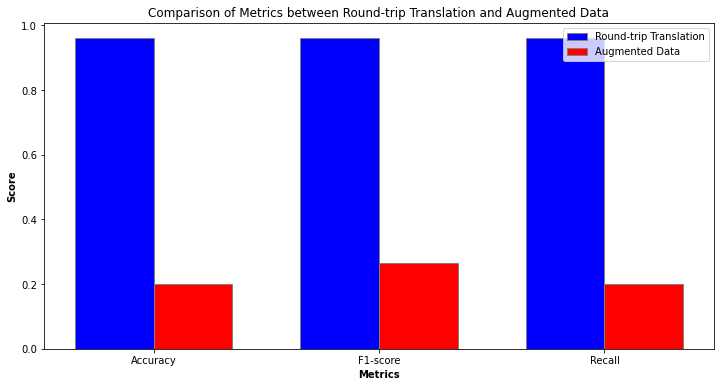

In [22]:
# Extract metric names and values
metric_names = list(round_trip_data_metrics.keys())
round_trip_values = list(round_trip_data_metrics.values())
augmented_data_values = list(augmented_data_metrics.values())

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(metric_names))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, round_trip_values, color='b', width=bar_width, edgecolor='grey', label='Round-trip Translation')
plt.bar(r2, augmented_data_values, color='r', width=bar_width, edgecolor='grey', label='Augmented Data')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metric_names))], metric_names)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of Metrics between Round-trip Translation and Augmented Data')
plt.show()

The graph shows considerable difference in metrics between model 2a ie round-trip transaltion and model 2b which is data with different distortions. The accuracy has reduced drastically between two models.

# 2c

The training data that will be used for part 3 is the data from round-trip translation because of high accuracy.

# 3a

The model used here is mobilebert-uncased

In [23]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Split the data into train and validation sets
train_texts_3, val_texts_3, train_labels_3, val_labels_3 = train_test_split(
    expanded_df["Utterance"], expanded_df["labels"], test_size=0.2
    
)
# Create dataframes for train and validation data
train_df_3 = pd.DataFrame({"Utterance": train_texts_3, "labels": train_labels_3})
val_df_3 = pd.DataFrame({"Utterance": val_texts_3, "labels": val_labels_3})

from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
label_encoder = LabelEncoder()

all_labels = expanded_df["labels"]
all_labels

label_encoder.fit(all_labels)

label_encoder.transform(train_labels_3)

num_labels = len(label_encoder.classes_)

# Load the tokenizer and model
tokenizer_1 = BertTokenizer.from_pretrained('google/mobilebert-uncased')
model_3 = BertForSequenceClassification.from_pretrained('google/mobilebert-uncased', num_labels=num_labels)  # Assuming you have 4 intent classes

# Tokenize the input texts
train_encodings_3 = tokenizer([str(text) for text in train_texts_3], truncation=True, padding=True)
val_encodings_3 = tokenizer([str(text) for text in val_texts_3], truncation=True, padding=True)

# Convert the Pandas Series to NumPy arrays
train_labels_array_3 = train_labels_3.to_numpy()
val_labels_array_3 = val_labels_3.to_numpy()

# Convert the NumPy arrays to PyTorch tensors
train_dataset_3 = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings_3["input_ids"]),
    torch.tensor(train_encodings_3["attention_mask"]),
    torch.tensor(train_labels_array_3)  # Ensure the dtype is torch.long for integer labels
)
val_dataset_3 = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings_3["input_ids"]),
    torch.tensor(val_encodings_3["attention_mask"]),
    torch.tensor(val_labels_array_3)  # Ensure the dtype is torch.long for integer labels
)

train_dataset_3 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(train_encodings_3["input_ids"], train_encodings_3["attention_mask"], train_labels_3)]
val_dataset_3 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(val_encodings_3["input_ids"], val_encodings_3["attention_mask"], val_labels_3)]


training_args_3 = TrainingArguments(
    per_device_train_batch_size=8,
    num_train_epochs=10,
    output_dir='./results',
    logging_dir='./logs',
)

trainer_3 = Trainer(
    model=model_3,
    args=training_args_3,
    train_dataset=train_dataset_3,
    eval_dataset=val_dataset_3  # Using the test dataset for evaluation
)

trainer_3.train()



The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MobileBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type mobilebert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.out

Step,Training Loss


TrainOutput(global_step=250, training_loss=0.5576078491210937, metrics={'train_runtime': 209.9324, 'train_samples_per_second': 9.527, 'train_steps_per_second': 1.191, 'total_flos': 8237777976000.0, 'train_loss': 0.5576078491210937, 'epoch': 10.0})

Evaluation metrics

In [24]:
# Train the model (assuming 'trainer' is already defined)
trainer_3.train()

# Generate predictions on the validation dataset
val_predictions_3 = trainer_3.predict(val_dataset_3)

# Extract predicted labels from the predictions
predicted_labels_3 = np.argmax(val_predictions_3.predictions, axis=1)

# Convert the NumPy array to a list
predicted_labels_3 = predicted_labels_3.tolist()

# Compute evaluation metrics
accuracy_3 = accuracy_score(val_labels_3, predicted_labels_3)
f1_3 = f1_score(val_labels_3, predicted_labels_3, average='weighted')  # Weighted F1 score for multiclass classification
recall_3 = recall_score(val_labels_3, predicted_labels_3, average='weighted')  # Weighted recall for multiclass classification


# Print the metrics
print(f"Accuracy: {accuracy_3}")
print(f"F1 Score: {f1_3}")
print(f"Recall: {recall_3}")


Step,Training Loss


Accuracy: 0.94
F1 Score: 0.934006734006734
Recall: 0.94


The accuracy dropped by 2% when model 3a is trained on round-trip data compared with the model 2a.

The run time for the same training data with distilbert-base-uncased model is 430.571s whereas it is 209.9324s for mobilebert-uncased model which is a considerable fast run time. It is due to lower size of model.


Comparing size of bigger model and small pretrained model

In [25]:
#comparing model size
import torch
import os

# Assuming your model is stored in a variable called `full_model`
model_path_before = "full_model.pt"
torch.save(model_1.state_dict(), model_path_before)

# Measure the file size
model_size_before = os.path.getsize(model_path_before) / (1024 * 1024)  # Convert bytes to megabytes
print(f"Size of the full model: {model_size_before} MB")

# Assuming your model is stored in a variable called `full_model`
model_path_before = "small_model.pt"
torch.save(model_3.state_dict(), model_path_before)

# Measure the file size
model_size_before = os.path.getsize(model_path_before) / (1024 * 1024)  # Convert bytes to megabytes
print(f"Size of the small model: {model_size_before} MB")


Size of the full model: 255.46036338806152 MB
Size of the small model: 206.25050735473633 MB


The size of model 3a is smaller than the full sized model in 2a.Hence, the smaller pretrained model has a faster run time and better for mobile phone app.

# 3b

Pruning is done for model 3a as it is a faster model and can be used on mobile phone app. It can be made even more efficient.

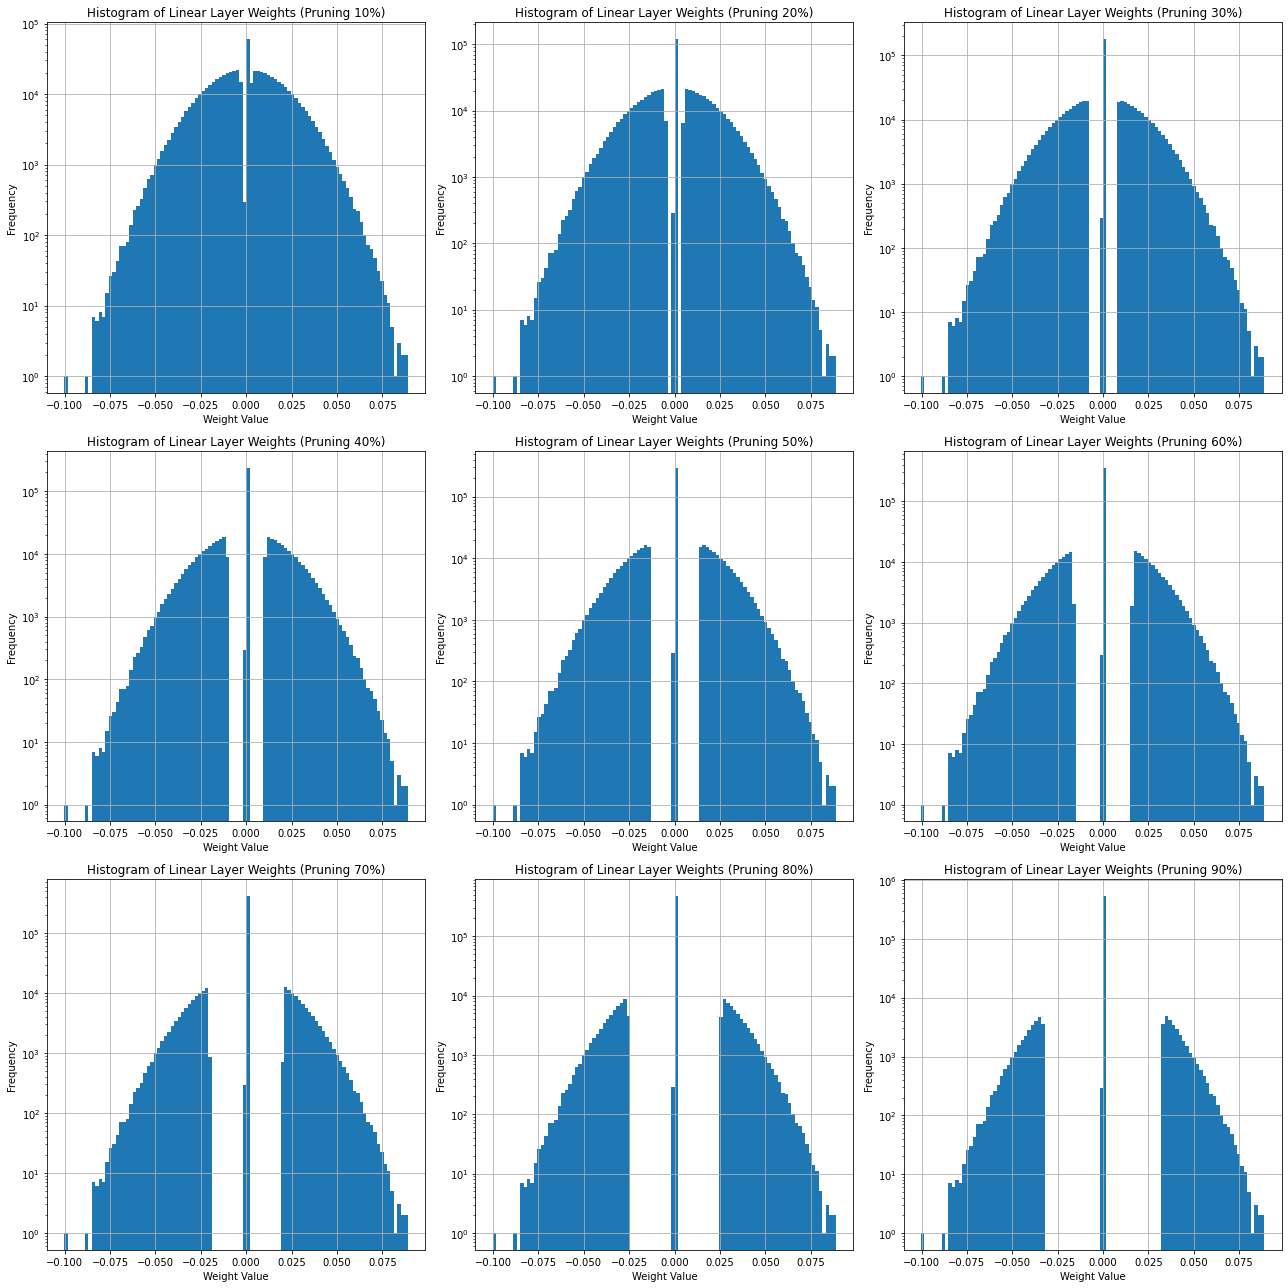

In [26]:
import matplotlib.pyplot as plt
from torch.nn.utils import prune

# Define a function to prune linear layers by a specific percentage
def prune_linear_layers(model, pruning_percent=10):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Linear):
            # Prune pruning_percent% of the weights in the linear layers
            prune.l1_unstructured(module, name='weight', amount=pruning_percent/100)

# Loop over the desired pruning percentages
pruning_percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Create a dictionary to store the accuracy for each pruning percentage
pruning_accuracies = {}



# Apply pruning and plot histograms
for idx, pruning_percent in enumerate(pruning_percentages):
    # Load the model
    model = model
    # Apply pruning
    prune_linear_layers(model, pruning_percent)
    
    # Make the pruning of the 'weight' parameter permanent
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Linear):
            prune.remove(module, 'weight')

    # Calculate the flattened weights of the linear layers
    linear_layer_weights = []
    for name, param in model.named_parameters():
        if 'classifier' in name or 'pre_classifier' in name:
            linear_layer_weights += param.data.flatten().tolist()


    # Plot the histogram in the corresponding subplot
    axs[idx//3, idx%3].hist(linear_layer_weights, bins=100)
    axs[idx//3, idx%3].set_yscale('log')  # Use logarithmic scale to better visualize the distribution
    axs[idx//3, idx%3].set_title(f'Histogram of Linear Layer Weights (Pruning {pruning_percent}%)')
    axs[idx//3, idx%3].set_xlabel('Weight Value')
    axs[idx//3, idx%3].set_ylabel('Frequency')
    axs[idx//3, idx%3].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



# 3c

To make the model even faster, quantization is used. The model that will be used is 3a as it can be better optimized and run time can be further reduced.


In [27]:

#quantization
from torch.quantization import quantize_dynamic

quantized_model = quantize_dynamic(model_3, {torch.nn.Linear}, dtype=torch.qint8)


In [28]:
#size of model
import os
float_model=model_3
# Assuming 'float_model' is your pre-trained DistilBert model
float_model_path = 'model.pt'
quantized_model_path = 'quantized_model.pt'

# Save the original model to disk to measure its size
torch.save(float_model.state_dict(), float_model_path)
float_model_size = os.path.getsize(float_model_path) / (1024 * 1024) # Size in MB

# Save the quantized model to disk to measure its size
torch.save(quantized_model.state_dict(), quantized_model_path)
quantized_model_size = os.path.getsize(quantized_model_path) / (1024 * 1024) # Size in MB

print(f"Original model size: {float_model_size:.2f} MB")
print(f"Quantized model size: {quantized_model_size:.2f} MB")

Original model size: 206.22 MB
Quantized model size: 97.61 MB


The size of quantized model is less than half of size of original model.

In [29]:
# Split the data into train and validation sets
train_texts_4, val_texts_4, train_labels_4, val_labels_4 = train_test_split(
    expanded_df["Utterance"], expanded_df["labels"], test_size=0.2
    
)
# Create dataframes for train and validation data
train_df_4 = pd.DataFrame({"Utterance": train_texts_4, "labels": train_labels_4})
val_df_4 = pd.DataFrame({"Utterance": val_texts_4, "labels": val_labels_4})

from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
label_encoder = LabelEncoder()

all_labels_1 = expanded_df["labels"]
all_labels_1

label_encoder.fit(all_labels_1)

label_encoder.transform(train_labels_4)

num_labels = len(label_encoder.classes_)

# Load the tokenizer and model
tokenizer_1 = BertTokenizer.from_pretrained('google/mobilebert-uncased')
model_4 = quantized_model  # Assuming you have 5 intent classes

# Tokenize the input texts
train_encodings_4 = tokenizer([str(text) for text in train_texts_4], truncation=True, padding=True)
val_encodings_4 = tokenizer([str(text) for text in val_texts_4], truncation=True, padding=True)

# Convert the Pandas Series to NumPy arrays
train_labels_array_4 = train_labels_4.to_numpy()
val_labels_array_4 = val_labels_4.to_numpy()

# Convert the NumPy arrays to PyTorch tensors
train_dataset_4 = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings_4["input_ids"]),
    torch.tensor(train_encodings_4["attention_mask"]),
    torch.tensor(train_labels_array_4)  # Ensure the dtype is torch.long for integer labels
)
val_dataset_4 = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings_4["input_ids"]),
    torch.tensor(val_encodings_4["attention_mask"]),
    torch.tensor(val_labels_array_4)  # Ensure the dtype is torch.long for integer labels
)

train_dataset_4 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(train_encodings_4["input_ids"], train_encodings_4["attention_mask"], train_labels_4)]
val_dataset_4 = [{"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "labels": torch.tensor(labels)} for input_ids, attention_mask, labels in zip(val_encodings_4["input_ids"], val_encodings_4["attention_mask"], val_labels_4)]


training_args_4 = TrainingArguments(
    per_device_train_batch_size=8,
    num_train_epochs=10,
    output_dir='./results',
    logging_dir='./logs',
)

trainer_4 = Trainer(
    model=model_4,
    args=training_args_4,
    train_dataset=train_dataset_4,
    eval_dataset=val_dataset_4  # Using the test dataset for evaluation
)

trainer_4.train()



The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MobileBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
C:\Users\Dell\anaconda3\lib\site-packages\torch\autograd\__init__.py:266: UserWarning: quantized::linear_dynamic: an autograd kernel was not registered to the Autograd key(s) but we are trying to backprop through it. This may lead to silently incorrect behavior. This behavior is deprecated and will be removed in a future version of PyTorch. If your operator is differentiable, please ensure you have registered an autograd kernel to the correct Autograd key (e.g. DispatchKey::Autograd, DispatchKey::CompositeImplicitAutograd). If your operator is not differentiable, or to squash this warning and use the previous behavior, please register torch::CppFunction::makeFallthrough() to DispatchKey::Autograd. 

Step,Training Loss


TrainOutput(global_step=250, training_loss=0.0036345105171203614, metrics={'train_runtime': 39.1203, 'train_samples_per_second': 51.124, 'train_steps_per_second': 6.391, 'total_flos': 10838016000.0, 'train_loss': 0.0036345105171203614, 'epoch': 10.0})

In [30]:
# Train the model (assuming 'trainer' is already defined)
trainer_4.train()

# Generate predictions on the validation dataset
val_predictions_4 = trainer_4.predict(val_dataset_4)

# Extract predicted labels from the predictions
predicted_labels_4 = np.argmax(val_predictions_4.predictions, axis=1)

# Convert the NumPy array to a list
predicted_labels_4 = predicted_labels_4.tolist()

# Compute evaluation metrics
accuracy_4 = accuracy_score(val_labels_4, predicted_labels_4)

# Print the metrics
print(f"Accuracy: {accuracy_4}")

Step,Training Loss


Accuracy: 0.94


The run time for training the quantized model is 39.1203s whereas the run time for training the model 3a is 209.9324s. So the run time has reduced drastically by quantization of model. While the accuracy for original and quantized model remains at 94%.

# 3d

I am using same training data as 2a for logistic regression and TFIDF and comparing the outputs against the model 3a.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for faster training
train_tfidf = tfidf_vectorizer.fit_transform(train_texts_1)
val_tfidf = tfidf_vectorizer.transform(val_texts_1)

In [33]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_tfidf, train_labels_1)
lr_predictions = lr_model.predict(val_tfidf)

# Evaluation metrics for Logistic Regression
lr_accuracy = accuracy_score(val_labels_1, lr_predictions)

# F1 Score
lr_f1 = f1_score(val_labels_1, lr_predictions, average='weighted')

# Recall
lr_recall = recall_score(val_labels_1, lr_predictions, average='weighted')


Evaluation metrics comparsion

In [35]:
# Compare metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"F1 Score: {lr_f1}")
print(f"Recall: {lr_recall}")


print("\nAlternative model metrics:")
# Print the metrics
print(f"Accuracy: {accuracy_3}")
print(f"F1 Score: {f1_3}")
print(f"Recall: {recall_3}")


Logistic Regression Metrics:
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0

Alternative model metrics:
Accuracy: 0.94
F1 Score: 0.934006734006734
Recall: 0.94


The logistic regression gives higher accuracy than mobilebert-uncased model (i.e 100%) that means it correctly predicts all the classes of validation data.

# 3e

Among all the models created, the model 3a which is then quantized is the best model to use for their mobile phone app. It is due to the following reasons:

1) It is compatible with range of devices irrespective of limited storage issues.

2) It leads to lower inference latency which means model is more responsive on mobile devices.

3) It will conserve the battery life of mobile devices.